In [4]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import numpy as np
import glob

In [5]:
imf_REF_AREA = ['AU', 'BH', 'BR', 'BN', 'KH', 'CA', 'HK', 'CN', 'CZ', 'DK', 'U2', 'FJ', 'HU', 'IN', 'ID', 'IL', 'JP', 'JO', 'KW', 'MY',
                 'MX', 'NZ', 'NO', 'PH', 'PL', 'RU', 'SA', 'SG', 'ZA', 'SE', 'CH', 'TW', 'TH', 'TR', 'AE', 'GB', 'US', 'VN', 'KR']
'''indicator 목록은 https://sdmxcentral.imf.org/items/codelist.html 에서 codelist에서 엑셀 파일로 다운로드 받아 확인'''
base_url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/IFS/'
series = ['AIP_IX', 'PCPI_IX', 'FIR_PA','RAXG_USD', 'ENSE_XDC_XDR_RATE']

In [13]:
key = f'M.{imf_REF_AREA[5]}.{series[1]}'
r = requests.get(f'{base_url}{key}').json()
imf_dict = r['CompactData']['DataSet']['Series']['Obs']
inf_CAD = pd.DataFrame(imf_dict)
inf_CAD

,@TIME_PERIOD,@OBS_VALUE,@OBS_STATUS
0,1920-01,9.10131654264453,NaN
1,1920-02,9.27303949627933,NaN
2,1920-03,9.61648540354894,NaN
3,1920-04,9.70234688036634,NaN
4,1920-05,9.95993131081854,NaN
...,...,...,...
1223,2021-12,123.640526617058,NaN
1224,2022-01,124.756725815684,NaN
1225,2022-02,126.044647967945,NaN
1226,2022-03,127.84773898111,NaN


In [17]:
key = f'M.{imf_REF_AREA[5]}.{series[3]}'
r = requests.get(f'{base_url}{key}').json()
imf_dict = r['CompactData']['DataSet']['Series']['Obs']
m1_CAD = pd.DataFrame(imf_dict)

,@TIME_PERIOD,@OBS_VALUE
0,1950-12,1265.01
1,1951-12,1064.01
2,1952-12,1058.91
3,1953-12,922.61
4,1954-12,964.31
5,1955-12,859.51
6,1956-12,940.41
7,1957-01,934.62
8,1957-02,929.02
9,1957-03,929.02


In [26]:
df = pd.merge(m1_CAD, inf_CAD, on = '@TIME_PERIOD', how = 'inner')
df = df.drop('@OBS_STATUS', axis = 1)
df = df.set_index('@TIME_PERIOD').astype('float')
df = df.drop(index=['1950-12', '1951-12','1952-12','1953-12','1954-12','1955-12', '1956-12'])
df.columns = ['m1', 'inf']
df

,m1,inf
@TIME_PERIOD,,
1957-01,934.620000,12.535776
1957-02,929.020000,12.535776
1957-03,929.020000,12.535776
1957-04,905.220000,12.621637
1957-05,934.320000,12.621637
...,...,...
2021-12,106615.119570,123.640527
2022-01,104402.248780,124.756726
2022-02,102889.214424,126.044648


In [28]:
a = (df['m1'].values[12:] - df['m1'].values[:len(df['m1'])-12])/df['m1'].values[:len(df['m1'])-12] * 100
b = (df['inf'].values[12:] - df['inf'].values[:len(df['inf'])-12])/df['inf'].values[:len(df['inf'])-12] * 100

In [36]:
c = df.index.values[12:]
c

array(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
       '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
       '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
       '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
       '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
       '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12',
       '1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
       '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
       '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
       '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
       '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
       '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12',
       '1964-01', '1964-02', '1964-03', '1964-04', '1964-05', '1964-06',
       '1964-07', '1964-08', '1964-09', '1964-10', 

                 inf         m1
1958-01-31  2.739726  -7.692966
1958-02-28  2.739726  -4.413253
1958-03-31  3.424658  -4.617769
1958-04-30  2.721088  -1.866949
1958-05-31  2.721088  -0.866941
...              ...        ...
2021-12-31  4.803493  17.900383
2022-01-31  5.137482  17.165116
2022-02-28  5.687545  19.187335
2022-03-31  6.661891  24.454099
2022-04-30  6.771205  25.232167

[772 rows x 2 columns]


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


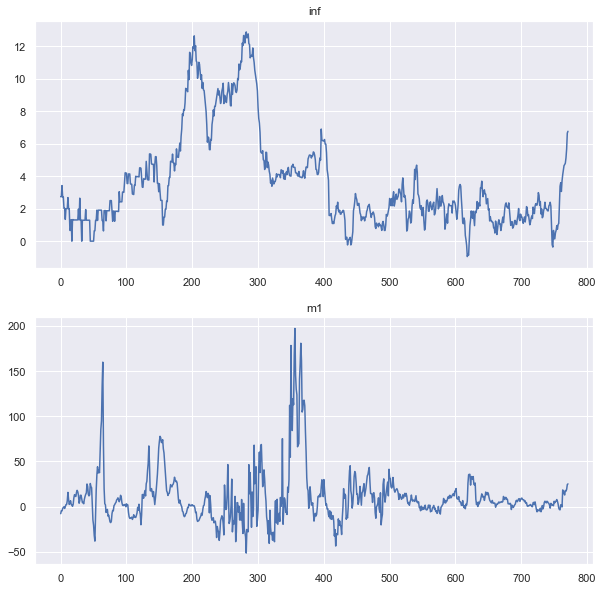

In [61]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.base.datetools import dates_from_str
month = [row[:4] + 'm' + row[5:].replace('0','') for row in c]
Y = pd.DataFrame({'inf' : b, 'm1' : a, })
monthly = dates_from_str(month)
Y.index = pd.DatetimeIndex(monthly)
print(Y)
model = VAR(Y)
results = model.fit(13)
results.plot()
plt.show()

In [62]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Jun, 2022
Time:                     08:47:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.75344
Nobs:                     759.000    HQIC:                   3.55081
Log likelihood:          -3399.32    FPE:                    30.6905
AIC:                      3.42389    Det(Omega_mle):         28.6182
--------------------------------------------------------------------
Results for equation inf
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.040323         0.026624            1.515           0.130
L1.inf          0.987187         0.033323           29.625           0.000
L1.m1          -0.000641         0.001148           -0.559           0.576
L2.inf     

In [63]:
# ADP 테스트 
adfuller_test = adfuller(Y['m1'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

adfuller_test = adfuller(Y['inf'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -4.931651741491831
p-value: 3.0250409617273382e-05
ADF test statistic: -2.61030065757134
p-value: 0.0908869646405977


In [64]:
model.select_order(15)
results = model.fit(maxlags=15, ic='aic')
results, results.k_ar

(<statsmodels.tsa.vector_ar.var_model.VARResultsWrapper at 0x12ef99d90>, 13)

In [66]:
lag_order = 13
results.forecast(Y.values[-lag_order:], 12) 

array([[ 6.79943909, 24.50034222],
       [ 7.15382496, 23.64153121],
       [ 6.97762644, 24.57512312],
       [ 6.9258813 , 16.85709133],
       [ 6.81564636, 16.13131966],
       [ 6.77399654, 16.56304052],
       [ 6.7805161 , 16.61874063],
       [ 6.81211121, 15.53634118],
       [ 6.75714578, 16.36106159],
       [ 6.51852808, 15.02716748],
       [ 6.10464456, 13.37597655],
       [ 6.03858693, 12.86812808]])

In [43]:
exchange_path = sorted(glob.glob('./../data/exchange/*'))
exchange = pd.read_csv(exchange_path[5])
exchange_CAD = exchange.iloc[22:]
exchange_CAD = exchange_CAD.reset_index().drop('index', axis = 1)
exchange_CAD = exchange_CAD.drop('Unnamed: 0', axis = 1)
exchange_CAD

,date,buy,standard
0,2022-03-31,986.89,970.15
1,2022-03-30,988.16,976.56
2,2022-03-29,993.60,979.11
3,2022-03-28,1000.83,975.93
4,2022-03-25,990.37,973.30
...,...,...,...
4595,2003-09-30,869.25,850.17
4596,2003-09-29,862.23,850.62
4597,2003-09-26,867.33,853.30
4598,2003-09-25,870.15,853.83


In [44]:
exchange_CAD['ex'] = np.log(exchange_CAD['buy']) # % 데이터
exchange_CAD['ex'].isnull().sum()
exchange_CAD

,date,buy,standard,ex
0,2022-03-31,986.89,970.15,6.894559
1,2022-03-30,988.16,976.56,6.895845
2,2022-03-29,993.60,979.11,6.901335
3,2022-03-28,1000.83,975.93,6.908585
4,2022-03-25,990.37,973.30,6.898079
...,...,...,...,...
4595,2003-09-30,869.25,850.17,6.767631
4596,2003-09-29,862.23,850.62,6.759522
4597,2003-09-26,867.33,853.30,6.765420
4598,2003-09-25,870.15,853.83,6.768666


In [45]:
import datetime
exchange_CAD['dt'] = pd.to_datetime(exchange_CAD['date'])
exchange_CAD['dt'] = exchange_CAD['dt'].dt.strftime('%Y-%m')
exchange_CAD

,date,buy,standard,ex,dt
0,2022-03-31,986.89,970.15,6.894559,2022-03
1,2022-03-30,988.16,976.56,6.895845,2022-03
2,2022-03-29,993.60,979.11,6.901335,2022-03
3,2022-03-28,1000.83,975.93,6.908585,2022-03
4,2022-03-25,990.37,973.30,6.898079,2022-03
...,...,...,...,...,...
4595,2003-09-30,869.25,850.17,6.767631,2003-09
4596,2003-09-29,862.23,850.62,6.759522,2003-09
4597,2003-09-26,867.33,853.30,6.765420,2003-09
4598,2003-09-25,870.15,853.83,6.768666,2003-09


In [46]:
interest_path = sorted(glob.glob('./../data/interest/*'))
interest_path[-2]

'./../data/interest/40_south-korea_government_bond_rate_1year.csv'

In [47]:
interest_path = sorted(glob.glob('./../data/interest/*'))
interest_Canada = pd.read_csv(interest_path[3])
interest_Korea = pd.read_csv(interest_path[-2])
interest_CAD = interest_Canada.iloc[26:]
interest_KOR = interest_Korea.iloc[49:-658]
interest_CAD, interest_KOR

(      Unnamed: 0        date  interest  change
 26            26  2022-03-31      1.96   -1.01
 27            27  2022-03-30      1.98    6.45
 28            28  2022-03-29      1.86    0.54
 29            29  2022-03-28      1.85    1.09
 30            30  2022-03-25      1.83    5.78
 ...          ...         ...       ...     ...
 5072        4995  2003-09-30      2.59   -2.26
 5073        4996  2003-09-29      2.65    1.15
 5074        4997  2003-09-26      2.62   -0.38
 5075        4998  2003-09-25      2.63    0.38
 5076        4999  2003-09-24      2.62   -0.38
 
 [5051 rows x 4 columns],
       Unnamed: 0        date  interest  change
 49            49  2022-03-31     1.675    1.39
 50            50  2022-03-30     1.652   -0.12
 51            51  2022-03-29     1.654   -0.36
 52            52  2022-03-28     1.660    6.14
 53            53  2022-03-27     1.564    0.00
 ...          ...         ...       ...     ...
 4780        4337  2003-12-12     4.640   -0.43
 4781       

In [48]:
start_date = pd.to_datetime(exchange_CAD.iloc[-1,0]) ## 시작 날짜
end_date = pd.to_datetime(exchange_CAD.iloc[0,0]) ## 마지막 날짜
 
dates = pd.date_range(start_date,end_date,freq='D')
padding = pd.DataFrame({'date' : dates})
padding = padding.sort_values(by = 'date', ascending = False).reset_index().drop('index', axis = 1)
padding['date'] = padding['date'].dt.strftime('%Y-%m-%d')
padding

,date
0,2022-03-31
1,2022-03-30
2,2022-03-29
3,2022-03-28
4,2022-03-27
...,...
6759,2003-09-28
6760,2003-09-27
6761,2003-09-26
6762,2003-09-25


In [49]:
interest_CAD_r = interest_CAD[['date', 'interest']]
interest_CAD_r = interest_CAD_r.rename(columns = {'interest' : 'int_CAD'})

interest_KOR_r = interest_KOR[['date', 'interest']]
interest_KOR_r = interest_KOR_r.rename(columns = {'interest' : 'int_KOR'})

In [50]:
padding_temp = pd.merge(padding,interest_CAD_r, on = 'date', how = 'outer')
padding_temp

,date,int_CAD
0,2022-03-31,1.96
1,2022-03-30,1.98
2,2022-03-29,1.86
3,2022-03-28,1.85
4,2022-03-27,NaN
...,...,...
6759,2003-09-28,NaN
6760,2003-09-27,NaN
6761,2003-09-26,2.62
6762,2003-09-25,2.63


In [51]:
padding_merge = pd.merge(padding_temp,interest_KOR_r, on = 'date', how = 'outer')
padding_merge

,date,int_CAD,int_KOR
0,2022-03-31,1.96,1.675
1,2022-03-30,1.98,1.652
2,2022-03-29,1.86,1.654
3,2022-03-28,1.85,1.660
4,2022-03-27,NaN,1.564
...,...,...,...
6760,2003-09-27,NaN,NaN
6761,2003-09-26,2.62,NaN
6762,2003-09-25,2.63,NaN
6763,2003-09-24,2.62,NaN


In [52]:
padding_null = padding_merge.notnull()
padding_null

,date,int_CAD,int_KOR
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,False,True
...,...,...,...
6760,True,False,False
6761,True,True,False
6762,True,True,False
6763,True,True,False


In [53]:
# for i in range(len(padding_merge)-2,-1,-1):
if not padding_null['int_KOR'][6763]:
    print('널값이다!')

널값이다!


In [54]:
for i in range(len(padding_merge)-2,-1,-1): # 6763부터 시작
    if not padding_null['int_CAD'][i]:
        padding_merge['int_CAD'][i] = padding_merge['int_CAD'][i+1]
    if not padding_null['int_KOR'][i]:
        padding_merge['int_KOR'][i] = padding_merge['int_KOR'][i+1]
padding_merge

/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_30399/3194149557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padding_merge['int_KOR'][i] = padding_merge['int_KOR'][i+1]
/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_30399/3194149557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padding_merge['int_CAD'][i] = padding_merge['int_CAD'][i+1]


,date,int_CAD,int_KOR
0,2022-03-31,1.96,1.675
1,2022-03-30,1.98,1.652
2,2022-03-29,1.86,1.654
3,2022-03-28,1.85,1.660
4,2022-03-27,1.83,1.564
...,...,...,...
6760,2003-09-27,2.62,4.140
6761,2003-09-26,2.62,4.140
6762,2003-09-25,2.63,4.140
6763,2003-09-24,2.62,4.140


In [55]:
padding_merge['int_spread'] = padding_merge['int_KOR'] - padding_merge['int_CAD']
padding_merge

,date,int_CAD,int_KOR,int_spread
0,2022-03-31,1.96,1.675,-0.285
1,2022-03-30,1.98,1.652,-0.328
2,2022-03-29,1.86,1.654,-0.206
3,2022-03-28,1.85,1.660,-0.190
4,2022-03-27,1.83,1.564,-0.266
...,...,...,...,...
6760,2003-09-27,2.62,4.140,1.520
6761,2003-09-26,2.62,4.140,1.520
6762,2003-09-25,2.63,4.140,1.510
6763,2003-09-24,2.62,4.140,1.520


In [56]:
exchange_CAD

,date,buy,standard,ex,dt
0,2022-03-31,986.89,970.15,6.894559,2022-03
1,2022-03-30,988.16,976.56,6.895845,2022-03
2,2022-03-29,993.60,979.11,6.901335,2022-03
3,2022-03-28,1000.83,975.93,6.908585,2022-03
4,2022-03-25,990.37,973.30,6.898079,2022-03
...,...,...,...,...,...
4595,2003-09-30,869.25,850.17,6.767631,2003-09
4596,2003-09-29,862.23,850.62,6.759522,2003-09
4597,2003-09-26,867.33,853.30,6.765420,2003-09
4598,2003-09-25,870.15,853.83,6.768666,2003-09


In [57]:
inflation_Canada = pd.read_excel('./../data/2차/inflation/inflation.xlsx')
data = inflation_Canada.iloc[3, 646:]
index = inflation_Canada.iloc[1, 646:]
index = inflation_Canada.iloc[1, 646:]

In [58]:
inflation_Korea = pd.read_excel('./../data/1차/imf 한미일 물가 지수.xlsx')
inf_KOR = inflation_Korea.iloc[5, 56:].values
b = inf_KOR[1:]
a = inf_KOR[ :len(inf_KOR)-1]
inf_KOR = (b-a)/a*100

In [59]:
liquidity_KOR = pd.read_excel('./../data/2차/Liquidity/korea_Liquidity.xlsx')
liquidity_KOR = liquidity_KOR.iloc[[6,7], 13:len(liquidity_KOR.columns) - 1]
li_KOR = liquidity_KOR.iloc[1].to_list()
li_KOR

[141472.189771548,
 143245.490267055,
 150272.828764654,
 155284.24111768702,
 157374.510530651,
 162935.078208282,
 163487.807592362,
 163568.789329762,
 166471.298234626,
 166957.734729665,
 167935.494449158,
 170421.19417898098,
 174376.151349565,
 178318.745973532,
 192532.20980153,
 198996.564800159,
 199625.684515137,
 202093.06654135,
 205375.03186027898,
 206304.69255837,
 206021.95207310998,
 204911.306474646,
 205611.839647257,
 206638.51974954997,
 206657.019466307,
 207230.74142497798,
 208155.722552622,
 210317.17683875,
 216859.72142311,
 215876.373989849,
 217270.52530455898,
 222817.822180379,
 224615.952178142,
 225641.855932564,
 225642.881954724,
 226951.08029103602,
 228149.3799656,
 229385.680228459,
 234183.30379193398,
 238882.310981532,
 240154.123618926,
 242737.577724628,
 243840.324670402,
 247185.053336666,
 250667.086628462,
 250627.710226456,
 254764.451034495,
 255228.015860249,
 257219.90224469,
 260064.838950044,
 261853.737593423,
 262150.152963913,
 2

In [60]:
liquidity_CAD = pd.read_excel('./../data/2차/Liquidity/canada_Liquidity.xlsx')
liquidity_CAD = liquidity_CAD.iloc[[6,7], 49:]
li_CAD = liquidity_CAD.iloc[1].to_list()
li_CAD

[36610.7230791447,
 35788.5922638138,
 36054.079623491096,
 36222.1007993034,
 36323.4155511149,
 35938.921517608396,
 36365.514774029405,
 35064.3562519509,
 35933.2672193344,
 35373.481271214405,
 35154.463410332,
 35843.575708309196,
 36215.2515931239,
 36413.990601160105,
 34032.191900559395,
 34428.643087875396,
 34544.3325654839,
 35514.502489482904,
 36199.3982172264,
 35556.385119772596,
 34989.561274412205,
 34876.105243225305,
 33282.6689654371,
 34251.748995632195,
 33547.292849792,
 34163.3680999335,
 34144.8671152696,
 32962.124276077,
 32896.903204591705,
 32623.387772995997,
 35966.2632597398,
 35645.983310801596,
 35613.0054447953,
 35845.663402193,
 36321.8375346482,
 35785.116344599504,
 35952.397829729794,
 35576.4359380041,
 36407.7520693555,
 34993.800647193704,
 35836.7918777717,
 36237.4695046624,
 39230.5962169836,
 40109.021411729205,
 40024.26189219081,
 39341.2475713,
 40229.9041147071,
 40228.380573019,
 40900.1942855364,
 40711.5495182959,
 40767.405923417,

In [61]:
date = liquidity_CAD.iloc[0, :]
li_df = pd.DataFrame({'date' : date, 'li_CAD': li_CAD, 'li_KOR':li_KOR})
li_df['li_CAD'] = np.log(li_df['li_CAD'])
li_df['li_KOR'] = np.log(li_df['li_KOR'])
li_df['li_spread'] = li_df['li_KOR'] - li_df['li_CAD']
li_df

,date,li_CAD,li_KOR,li_spread
Unnamed: 49,2003M09,10.508096,11.859858,1.351762
Unnamed: 50,2003M10,10.485384,11.872315,1.386931
Unnamed: 51,2003M11,10.492775,11.920208,1.427432
Unnamed: 52,2003M12,10.497425,11.953013,1.455588
Unnamed: 53,2004M01,10.500218,11.966384,1.466166
...,...,...,...,...
Unnamed: 267,2021M11,11.548549,13.034616,1.486067
Unnamed: 268,2021M12,11.576981,13.032809,1.455829
Unnamed: 269,2022M01,11.556006,13.029335,1.473329
Unnamed: 270,2022M02,11.541408,13.029883,1.488475


In [62]:
monthly = pd.DataFrame({'index' : index, 'inf_CAD': data, 'inf_KOR' : inf_KOR})
monthly['dt'] = monthly['index'].str[:4] + '-' + monthly['index'].str[5:]
monthly['dt'] = pd.to_datetime(monthly['dt'])
monthly['dt'] = monthly['dt'].dt.strftime('%Y-%m')
monthly['inf_spread'] = monthly['inf_KOR'] - monthly['inf_CAD']
monthly['m1_spread'] = li_df['li_spread'].values
monthly

,index,inf_CAD,inf_KOR,dt,inf_spread,m1_spread
Unnamed: 646,2003M09,0.194363,0.904861,2003-09,0.710497,1.351762
Unnamed: 647,2003M10,-0.29098,0.087972,2003-10,0.378952,1.386931
Unnamed: 648,2003M11,0.291829,-0.178625,2003-11,-0.470453,1.427432
Unnamed: 649,2003M12,0.096993,0.450201,2003-12,0.353208,1.455588
Unnamed: 650,2004M01,0.096899,0.624912,2004-01,0.528012,1.466166
...,...,...,...,...,...,...
Unnamed: 864,2021M11,0.208478,0.503145,2021-11,0.294667,1.486067
Unnamed: 865,2021M12,-0.138696,0.163666,2021-12,0.302362,1.455829
Unnamed: 866,2022M01,0.902778,0.62476,2022-01,-0.278018,1.473329
Unnamed: 867,2022M02,1.032347,0.582673,2022-02,-0.449674,1.488475


In [63]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [64]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [65]:
adf_test(monthly['inf_spread'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.544897
p-value                          0.511196
#Lags Used                      14.000000
Number of Observations Used    208.000000
Critical Value (1%)             -3.462186
Critical Value (5%)             -2.875538
Critical Value (10%)            -2.574231
dtype: float64


In [66]:
adf_test(monthly['m1_spread'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.164874
p-value                          0.219240
#Lags Used                       0.000000
Number of Observations Used    222.000000
Critical Value (1%)             -3.460154
Critical Value (5%)             -2.874649
Critical Value (10%)            -2.573757
dtype: float64


In [26]:
inflation_spread_list = monthly['inf_spread'].to_list()
liquidity_spread_list = monthly['m1_spread'].to_list()
monthly_index_list = monthly['dt'].to_list()
exchange_CAD['inf_spread'] = 'nan'
exchange_CAD['m1_spread'] = 'nan'
for i in range(len(exchange_CAD)):
    try:
        exchange_CAD['inf_spread'][i] = inflation_spread_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
        exchange_CAD['m1_spread'][i] = liquidity_spread_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
    except: print(f'{i}외왆되?')
exchange_CAD

/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_30399/1274888129.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_CAD['inf_spread'][i] = inflation_spread_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_30399/1274888129.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_CAD['m1_spread'][i] = liquidity_spread_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]


,date,buy,standard,ex,dt,inf_spread,m1_spread
0,2022-03-31,986.89,970.15,6.894559,2022-03,-0.70877,1.471268
1,2022-03-30,988.16,976.56,6.895845,2022-03,-0.70877,1.471268
2,2022-03-29,993.60,979.11,6.901335,2022-03,-0.70877,1.471268
3,2022-03-28,1000.83,975.93,6.908585,2022-03,-0.70877,1.471268
4,2022-03-25,990.37,973.30,6.898079,2022-03,-0.70877,1.471268
...,...,...,...,...,...,...,...
4595,2003-09-30,869.25,850.17,6.767631,2003-09,0.710497,1.351762
4596,2003-09-29,862.23,850.62,6.759522,2003-09,0.710497,1.351762
4597,2003-09-26,867.33,853.30,6.765420,2003-09,0.710497,1.351762
4598,2003-09-25,870.15,853.83,6.768666,2003-09,0.710497,1.351762


In [28]:
left = exchange_CAD[['date', 'ex', 'inf_spread', 'm1_spread']]
right = padding_merge[['date', 'int_spread']]
merge_df = pd.merge(left,right, on = 'date', how = 'left', sort = True)
merge_df

,date,ex,inf_spread,m1_spread,int_spread
0,2003-09-24,6.763134,0.710497,1.351762,1.520
1,2003-09-25,6.768666,0.710497,1.351762,1.510
2,2003-09-26,6.765420,0.710497,1.351762,1.520
3,2003-09-29,6.759522,0.710497,1.351762,1.490
4,2003-09-30,6.767631,0.710497,1.351762,1.550
...,...,...,...,...,...
4595,2022-03-25,6.898079,-0.70877,1.471268,-0.266
4596,2022-03-28,6.908585,-0.70877,1.471268,-0.190
4597,2022-03-29,6.901335,-0.70877,1.471268,-0.206
4598,2022-03-30,6.895845,-0.70877,1.471268,-0.328


In [29]:
merge_df.isnull().sum()

date          0
ex            0
inf_spread    0
m1_spread     0
int_spread    0
dtype: int64

In [30]:
merge_df = merge_df.set_index('date')
merge_df = merge_df.astype('float')

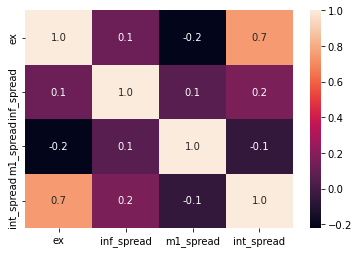

In [41]:
sns.heatmap(merge_df.corr(), annot=True, fmt='3.1f')
plt.show()

In [34]:
from statsmodels.formula.api import ols

model = ols("ex ~ + inf_spread + m1_spread + int_spread", merge_df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ex   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2222.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:08:32   Log-Likelihood:                 5553.1
No. Observations:                4600   AIC:                        -1.110e+04
Df Residuals:                    4596   BIC:                        -1.107e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0246      0.014    491.522      0.000       6.997       7.053
inf_spread     0.0008      0.002      0.304      0.761      -0.004       0.006
m1_spread     -0.1664      0.009    -18.917      0.000      -0.184      -0.149
int_spread     0.0970      0.001     77.034      0.000       0.095       0.099
==============================================================================
Omnibus:                        4.785   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                5.200
Skew:                           0.024   Prob(JB):                       0.0743
Kurtosis:                       3.157   Cond. No.                         35.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model.exog_names

['Intercept', 'inf_spread', 'm1_spread', 'int_spread']

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variance_inflation_factor(model.exog, 1)

1.032747522708444

In [39]:
variance_inflation_factor(model.exog, 2)

1.0080255907985125

In [40]:
variance_inflation_factor(model.exog, 3)

1.032639774020161

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def draw_plot(data, data_diff):
    plt.plot(data, label="Original")
    plt.plot(data_diff, label="diff_1")
    plt.suptitle("CO2", size=24)
    plt.xlabel("Time")
    plt.legend()
    plt.show()

## ADF
def ADF(data):

    result = adfuller(data, autolag="AIC")

    print("---- Adfuller ----")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %1.10f' % result[1])
    print('Lag: %d' % result[2])
    print('observation: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

if __name__ == '__main__':

    draw_plot(data=merge_df, data_diff=data_diff)
    ADF(data_diff)

NameError: name 'data_diff' is not defined

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

[[6.900579595233041, -0.24499999999999988, 1.4712682817295981, -0.7087703227575981], [6.898078610679957, -0.266, 1.4712682817295981, -0.7087703227575981], [6.908584934722614, -0.19000000000000017, 1.4712682817295981, -0.7087703227575981], [6.9013347111792145, -0.20600000000000018, 1.4712682817295981, -0.7087703227575981], [6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 5)              200       
                                                                 
 lstm_9 (LSTM)               (None, 5)                 220       
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 426
T

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-20 22:41:55.495584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 22:41:55.677996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/322 [..............................] - ETA: 5:02 - loss: 48.6244

2022-05-20 22:41:55.710892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 22:41:55.753927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 22:41:55.819986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 4s 11ms/step - loss: 31.3429
Epoch 2/300
322/322 [==============================] - 3s 10ms/step - loss: 8.4631
Epoch 3/300
322/322 [==============================] - 3s 10ms/step - loss: 2.3367
Epoch 4/300
322/322 [==============================] - 3s 10ms/step - loss: 0.5077
Epoch 5/300
322/322 [==============================] - 3s 10ms/step - loss: 0.0871
Epoch 6/300
322/322 [==============================] - 3s 10ms/step - loss: 0.0214
Epoch 7/300
322/322 [==============================] - 3s 10ms/step - loss: 0.0150
Epoch 8/300
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 9/300
322/322 [==============================] - 3s 11ms/step - loss: 0.0146
Epoch 10/300
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 11/300
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 12/300
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 13/300

322/322 [==============================] - 3s 10ms/step - loss: 2.8929e-04
Epoch 98/300
322/322 [==============================] - 3s 10ms/step - loss: 2.5096e-04
Epoch 99/300
322/322 [==============================] - 3s 10ms/step - loss: 2.7863e-04
Epoch 100/300
322/322 [==============================] - 3s 10ms/step - loss: 3.1955e-04
Epoch 101/300
322/322 [==============================] - 3s 10ms/step - loss: 2.6392e-04
Epoch 102/300
322/322 [==============================] - 3s 10ms/step - loss: 2.5217e-04
Epoch 103/300
322/322 [==============================] - 3s 10ms/step - loss: 2.2650e-04
Epoch 104/300
322/322 [==============================] - 3s 10ms/step - loss: 2.7872e-04
Epoch 105/300
322/322 [==============================] - 3s 10ms/step - loss: 2.5777e-04
Epoch 106/300
322/322 [==============================] - 3s 10ms/step - loss: 2.7377e-04
Epoch 107/300
322/322 [==============================] - 3s 10ms/step - loss: 2.6695e-04
Epoch 108/300
322/322 [==============

322/322 [==============================] - 3s 10ms/step - loss: 1.7292e-04
Epoch 282/300
322/322 [==============================] - 3s 10ms/step - loss: 1.8310e-04
Epoch 283/300
322/322 [==============================] - 3s 10ms/step - loss: 2.3770e-04
Epoch 284/300
322/322 [==============================] - 3s 10ms/step - loss: 1.7347e-04
Epoch 285/300
322/322 [==============================] - 3s 10ms/step - loss: 1.8069e-04
Epoch 286/300
322/322 [==============================] - 3s 10ms/step - loss: 1.7390e-04
Epoch 287/300
322/322 [==============================] - 3s 10ms/step - loss: 1.7274e-04
Epoch 288/300
322/322 [==============================] - 3s 10ms/step - loss: 1.7478e-04
Epoch 289/300
322/322 [==============================] - 3s 10ms/step - loss: 1.4434e-04
Epoch 290/300
322/322 [==============================] - 3s 10ms/step - loss: 1.9341e-04
Epoch 291/300
322/322 [==============================] - 3s 10ms/step - loss: 1.8257e-04
Epoch 292/300
322/322 [============

2022-05-20 22:58:18.017145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 22:58:18.098924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 22:58:18.185838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


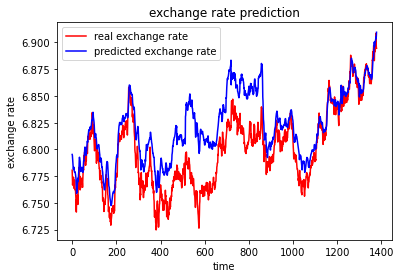

Tomorrow's exchange rate : 986.8899999999996 CAD/KRW


In [31]:
# 로그 환율 = 두 국가간 인플레이션 차이, 두 국가간 로그 통화량 차이, 두 국가간 이자율 차이

dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

[[6.900579595233041, -0.24499999999999988, 1.4712682817295981, -0.7087703227575981], [6.898078610679957, -0.266, 1.4712682817295981, -0.7087703227575981], [6.908584934722614, -0.19000000000000017, 1.4712682817295981, -0.7087703227575981], [6.9013347111792145, -0.20600000000000018, 1.4712682817295981, -0.7087703227575981], [6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 5, 5)              200       
                                                                 
 lstm_11 (LSTM)              (None, 5)                 220       
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 426
T

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-20 22:58:36.599517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 22:58:36.844740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 22:58:36.883722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 22:58:36.937274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 22:58:37.011467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 5s 11ms/step - loss: 31.3689
Epoch 2/100
322/322 [==============================] - 3s 10ms/step - loss: 8.3775
Epoch 3/100
322/322 [==============================] - 3s 10ms/step - loss: 2.1812
Epoch 4/100
322/322 [==============================] - 3s 10ms/step - loss: 0.4497
Epoch 5/100
322/322 [==============================] - 3s 11ms/step - loss: 0.0744
Epoch 6/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0199
Epoch 7/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0149
Epoch 8/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 9/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 10/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 11/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 12/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 13/100

2022-05-20 23:04:00.862875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:04:00.923987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:04:00.980007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


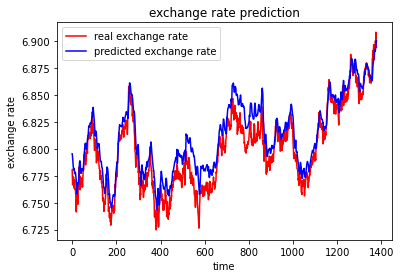

Tomorrow's exchange rate : [6.9005184] CAD/KRW


In [32]:
dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 100
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=100, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

[[6.900579595233041, -0.24499999999999988, 1.4712682817295981, -0.7087703227575981], [6.898078610679957, -0.266, 1.4712682817295981, -0.7087703227575981], [6.908584934722614, -0.19000000000000017, 1.4712682817295981, -0.7087703227575981], [6.9013347111792145, -0.20600000000000018, 1.4712682817295981, -0.7087703227575981], [6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 5, 5)              200       
                                                                 
 lstm_13 (LSTM)              (None, 5)                 220       
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 426
T

2022-05-20 23:04:15.517812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:04:15.708100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:04:15.759656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:04:15.805699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:04:15.891298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 4s 11ms/step - loss: 31.3787
Epoch 2/100
322/322 [==============================] - 3s 10ms/step - loss: 8.7546
Epoch 3/100
322/322 [==============================] - 3s 11ms/step - loss: 2.4788
Epoch 4/100
322/322 [==============================] - 4s 13ms/step - loss: 0.5518
Epoch 5/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0962
Epoch 6/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0226
Epoch 7/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0151
Epoch 8/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 9/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 10/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 11/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0146
Epoch 12/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0145
Epoch 13/100

2022-05-20 23:09:36.446620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:09:36.517348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:09:36.578226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


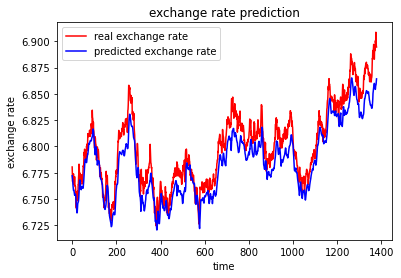

Tomorrow's exchange rate : [6.8642726] CAD/KRW


In [33]:
## 기본 'adam'
dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 100
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=100, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

[[6.900579595233041, -0.24499999999999988, 1.4712682817295981, -0.7087703227575981], [6.898078610679957, -0.266, 1.4712682817295981, -0.7087703227575981], [6.908584934722614, -0.19000000000000017, 1.4712682817295981, -0.7087703227575981], [6.9013347111792145, -0.20600000000000018, 1.4712682817295981, -0.7087703227575981], [6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 5, 5)              200       
                                                                 
 lstm_15 (LSTM)              (None, 5)                 220       
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 426
T

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-20 23:09:37.674616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:09:37.864820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:09:37.906531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:09:37.971504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:09:38.066898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 4s 10ms/step - loss: 47.0887
Epoch 2/100
322/322 [==============================] - 3s 10ms/step - loss: 44.6051
Epoch 3/100
322/322 [==============================] - 3s 10ms/step - loss: 41.4070
Epoch 4/100
322/322 [==============================] - 3s 10ms/step - loss: 37.4993
Epoch 5/100
322/322 [==============================] - 3s 10ms/step - loss: 33.1345
Epoch 6/100
322/322 [==============================] - 3s 10ms/step - loss: 29.2175
Epoch 7/100
322/322 [==============================] - 3s 10ms/step - loss: 25.8754
Epoch 8/100
322/322 [==============================] - 3s 10ms/step - loss: 22.8168
Epoch 9/100
322/322 [==============================] - 3s 10ms/step - loss: 19.9077
Epoch 10/100
322/322 [==============================] - 3s 10ms/step - loss: 17.4834
Epoch 11/100
322/322 [==============================] - 3s 10ms/step - loss: 15.5143
Epoch 12/100
322/322 [==============================] - 3s 10ms/step - loss: 13.8345
E

2022-05-20 23:15:03.279459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:15:03.344161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 23:15:03.403130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


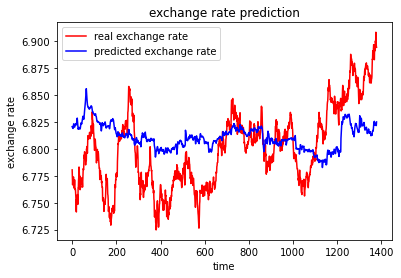

Tomorrow's exchange rate : [6.8251586] CAD/KRW


In [34]:
# lr = 0.0001로 매우 낮게 설정

dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 100
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=100, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

[[6.900579595233041, -0.24499999999999988, 1.4712682817295981, -0.7087703227575981], [6.898078610679957, -0.266, 1.4712682817295981, -0.7087703227575981], [6.908584934722614, -0.19000000000000017, 1.4712682817295981, -0.7087703227575981], [6.9013347111792145, -0.20600000000000018, 1.4712682817295981, -0.7087703227575981], [6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 5)              200       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                         

2022-05-20 23:54:39.775341: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-20 23:54:39.775486: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-20 23:54:39.918819: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-20 23:54:40.390833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is ena

322/322 [==============================] - 23s 68ms/step - loss: 11.5446
Epoch 2/100
322/322 [==============================] - 22s 69ms/step - loss: 0.0216
Epoch 3/100
322/322 [==============================] - 24s 75ms/step - loss: 0.0115
Epoch 4/100
322/322 [==============================] - 25s 76ms/step - loss: 0.0066
Epoch 5/100
322/322 [==============================] - 25s 79ms/step - loss: 0.0033
Epoch 6/100
322/322 [==============================] - 26s 79ms/step - loss: 0.0018
Epoch 7/100
322/322 [==============================] - 25s 78ms/step - loss: 0.0013
Epoch 8/100
322/322 [==============================] - 25s 78ms/step - loss: 0.0011
Epoch 9/100
322/322 [==============================] - 25s 78ms/step - loss: 0.0011
Epoch 10/100
322/322 [==============================] - 25s 79ms/step - loss: 9.5703e-04
Epoch 11/100
322/322 [==============================] - 25s 79ms/step - loss: 8.9268e-04
Epoch 12/100
322/322 [==============================] - 26s 79ms/step - loss:

2022-05-21 00:37:06.913284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


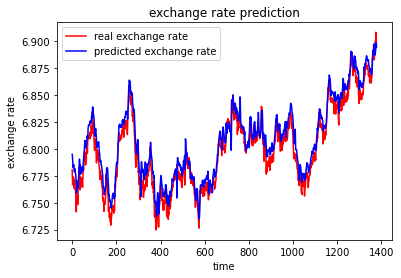

Tomorrow's exchange rate : 986.8899999999996 CAD/KRW


In [27]:
# 활성화 함수 relu

dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 100
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='relu'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=100, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

[[6.900579595233041, -0.24499999999999988, 1.4712682817295981, -0.7087703227575981], [6.898078610679957, -0.266, 1.4712682817295981, -0.7087703227575981], [6.908584934722614, -0.19000000000000017, 1.4712682817295981, -0.7087703227575981], [6.9013347111792145, -0.20600000000000018, 1.4712682817295981, -0.7087703227575981], [6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 5)              200       
                                                                 
 lstm_3 (LSTM)               (None, 5)                 220       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 426
T

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-21 00:37:08.359254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:37:08.565275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:37:08.616491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:37:08.676070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:37:08.765425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 4s 10ms/step - loss: 0.0000e+00
Epoch 2/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 3/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 4/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 5/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 6/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 7/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 8/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 9/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 10/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 11/100
322/322 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 12/100
322/322 [==============================]

2022-05-21 00:42:39.177280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:42:39.238146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:42:39.267906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


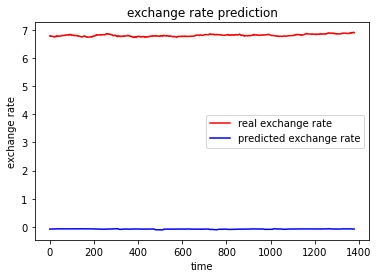

Tomorrow's exchange rate : 986.8899999999996 CAD/KRW


In [28]:
## 손실함수 crossentropy 설정

dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 100
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=100, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

[[6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 5)              200       
                                                                 
 lstm_5 (LSTM)               (None, 5)                 220       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-21 00:42:40.246246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:42:40.430557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  7/322 [..............................] - ETA: 3s - loss: 47.5111  

2022-05-21 00:42:40.458583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:42:40.500419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:42:40.550374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 4s 8ms/step - loss: 34.8118
Epoch 2/100
322/322 [==============================] - 3s 8ms/step - loss: 5.3245
Epoch 3/100
322/322 [==============================] - 3s 8ms/step - loss: 0.9869
Epoch 4/100
322/322 [==============================] - 3s 8ms/step - loss: 0.1563
Epoch 5/100
322/322 [==============================] - 3s 8ms/step - loss: 0.0261
Epoch 6/100
322/322 [==============================] - 3s 8ms/step - loss: 0.0134
Epoch 7/100
322/322 [==============================] - 3s 8ms/step - loss: 0.0127
Epoch 8/100
322/322 [==============================] - 3s 8ms/step - loss: 0.0126
Epoch 9/100
322/322 [==============================] - 3s 8ms/step - loss: 0.0126
Epoch 10/100
322/322 [==============================] - 3s 8ms/step - loss: 0.0125
Epoch 11/100
322/322 [==============================] - 3s 8ms/step - loss: 0.0125
Epoch 12/100
322/322 [==============================] - 3s 8ms/step - loss: 0.0124
Epoch 13/100
322/322 [==

322/322 [==============================] - 3s 8ms/step - loss: 1.2656e-04
Epoch 99/100
322/322 [==============================] - 3s 8ms/step - loss: 1.3992e-04
Epoch 100/100
322/322 [==============================] - 3s 8ms/step - loss: 1.1757e-04


2022-05-21 00:47:07.011584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:47:07.071505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:47:07.100967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


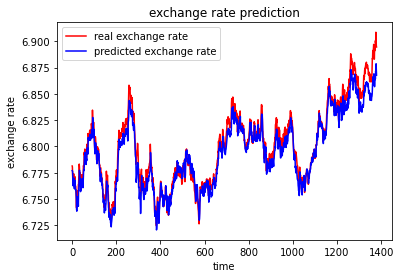

Tomorrow's exchange rate : 986.8899999999996 CAD/KRW


In [29]:
# window_size = 1로 설정

dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 100
dfy = dfx[['ex']]

window_size = 1
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=100, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

[[6.900579595233041, -0.24499999999999988, 1.4712682817295981, -0.7087703227575981], [6.898078610679957, -0.266, 1.4712682817295981, -0.7087703227575981], [6.908584934722614, -0.19000000000000017, 1.4712682817295981, -0.7087703227575981], [6.9013347111792145, -0.20600000000000018, 1.4712682817295981, -0.7087703227575981], [6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 5)              200       
                                                                 
 dropout (Dropout)           (None, 5, 5)              0         
                                                                 
 lstm_7 (LSTM)               (None, 5)                 220       
                                                                 
 dropout_1 (Dropout

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-21 00:47:08.240379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:47:08.439612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/322 [..............................] - ETA: 5:12 - loss: 48.2521

2022-05-21 00:47:08.476439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:47:08.523968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:47:08.585985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 4s 11ms/step - loss: 21.6615
Epoch 2/100
322/322 [==============================] - 3s 11ms/step - loss: 1.3210
Epoch 3/100
322/322 [==============================] - 3s 10ms/step - loss: 0.3681
Epoch 4/100
322/322 [==============================] - 3s 11ms/step - loss: 0.2973
Epoch 5/100
322/322 [==============================] - 3s 11ms/step - loss: 0.2764
Epoch 6/100
322/322 [==============================] - 3s 11ms/step - loss: 0.2603
Epoch 7/100
322/322 [==============================] - 3s 11ms/step - loss: 0.2385
Epoch 8/100
322/322 [==============================] - 3s 11ms/step - loss: 0.2186
Epoch 9/100
322/322 [==============================] - 3s 11ms/step - loss: 0.1956
Epoch 10/100
322/322 [==============================] - 3s 11ms/step - loss: 0.1678
Epoch 11/100
322/322 [==============================] - 3s 11ms/step - loss: 0.1297
Epoch 12/100
322/322 [==============================] - 3s 11ms/step - loss: 0.0935
Epoch 13/100

2022-05-21 00:52:49.876556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:52:49.936286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 00:52:49.969081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


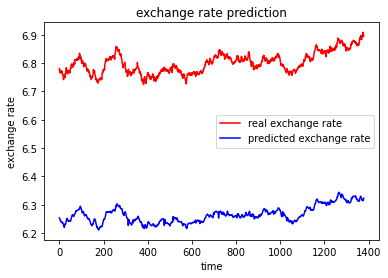

Tomorrow's exchange rate : 986.8899999999996 CAD/KRW


In [30]:
# dropout 설정

dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 100
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=100, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

[[6.900579595233041, -0.24499999999999988, 1.4712682817295981, -0.7087703227575981], [6.898078610679957, -0.266, 1.4712682817295981, -0.7087703227575981], [6.908584934722614, -0.19000000000000017, 1.4712682817295981, -0.7087703227575981], [6.9013347111792145, -0.20600000000000018, 1.4712682817295981, -0.7087703227575981], [6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 5, 5)              165       
                                                                 
 gru_9 (GRU)                 (None, 5)                 180       
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 351
T

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-21 16:13:10.935860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 16:13:11.113059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/322 [..............................] - ETA: 4:59 - loss: 36.4595

2022-05-21 16:13:11.140263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 16:13:11.184877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 16:13:11.240151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 4s 9ms/step - loss: 17.8347
Epoch 2/50
322/322 [==============================] - 3s 9ms/step - loss: 4.8421
Epoch 3/50
322/322 [==============================] - 3s 9ms/step - loss: 1.1922
Epoch 4/50
322/322 [==============================] - 3s 9ms/step - loss: 0.2153
Epoch 5/50
322/322 [==============================] - 3s 9ms/step - loss: 0.0363
Epoch 6/50
322/322 [==============================] - 3s 9ms/step - loss: 0.0159
Epoch 7/50
322/322 [==============================] - 3s 10ms/step - loss: 0.0144
Epoch 8/50
322/322 [==============================] - 3s 9ms/step - loss: 0.0144
Epoch 9/50
322/322 [==============================] - 3s 9ms/step - loss: 0.0144
Epoch 10/50
322/322 [==============================] - 3s 9ms/step - loss: 0.0144
Epoch 11/50
322/322 [==============================] - 3s 9ms/step - loss: 0.0144
Epoch 12/50
322/322 [==============================] - 3s 9ms/step - loss: 0.0144
Epoch 13/50
322/322 [=============

2022-05-21 16:15:36.589625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 16:15:36.645306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 16:15:36.682091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


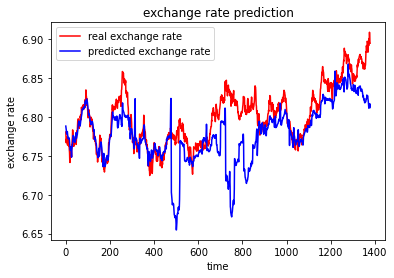

Tomorrow's exchange rate : [908.6164] CAD/KRW


In [32]:
# 로그 환율 = 두 국가간 인플레이션 차이, 두 국가간 로그 통화량 차이, 두 국가간 이자율 차이

dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(GRU(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(GRU(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=50, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

In [ ]:
print("Tomorrow's exchange rate :", np.exp(merge_df['ex'] * pred_y[-1] / dfy.close[-1]), 'CAD/KRW')

[[6.900579595233041, -0.24499999999999988, 1.4712682817295981, -0.7087703227575981], [6.898078610679957, -0.266, 1.4712682817295981, -0.7087703227575981], [6.908584934722614, -0.19000000000000017, 1.4712682817295981, -0.7087703227575981], [6.9013347111792145, -0.20600000000000018, 1.4712682817295981, -0.7087703227575981], [6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 5)              200       
                                                                 
 lstm_3 (LSTM)               (None, 5)                 220       
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 426
T

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-21 17:18:58.013380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 17:18:58.238877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 17:18:58.299580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 17:18:58.369345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 17:18:58.438072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


290/290 [==============================] - ETA: 0s - loss: 25.2100

2022-05-21 17:19:01.699640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 17:19:01.768699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 17:19:01.812192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


290/290 [==============================] - 5s 12ms/step - loss: 25.2100 - val_loss: 6.9095
Epoch 2/100
290/290 [==============================] - 3s 11ms/step - loss: 4.0283 - val_loss: 1.5101
Epoch 3/100
290/290 [==============================] - 3s 11ms/step - loss: 0.8962 - val_loss: 0.2099
Epoch 4/100
290/290 [==============================] - 3s 11ms/step - loss: 0.1510 - val_loss: 0.0077
Epoch 5/100
290/290 [==============================] - 3s 11ms/step - loss: 0.0283 - val_loss: 0.0037
Epoch 6/100
290/290 [==============================] - 3s 11ms/step - loss: 0.0156 - val_loss: 0.0102
Epoch 7/100
290/290 [==============================] - 3s 11ms/step - loss: 0.0148 - val_loss: 0.0119
Epoch 8/100
290/290 [==============================] - 3s 11ms/step - loss: 0.0148 - val_loss: 0.0117
Epoch 9/100
290/290 [==============================] - 3s 11ms/step - loss: 0.0148 - val_loss: 0.0125
Epoch 10/100
290/290 [==============================] - 3s 11ms/step - loss: 0.0147 - val_los

2022-05-21 17:24:11.986411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 17:24:12.061944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 17:24:12.119762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


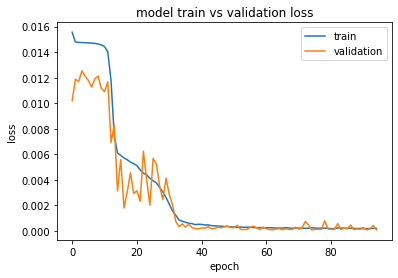

Tomorrow's exchange rate : [938.3016] CAD/KRW


In [36]:
dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 100
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
history = model.fit(train_x, train_y, epochs=100, batch_size=10, validation_split=0.1)
pred_y = model.predict(test_x)

# Visualising the results
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

In [68]:
## window size = 5

dfx = merge_df[['int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 600
dfy = merge_df[['ex']]

window_size = 5
data_size = 3

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.9)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
history = model.fit(train_x, train_y, epochs=600, batch_size=10, validation_split=0.1)
pred_y = model.predict(test_x)

# Visualising the results
plt.plot(history.history['loss'][25:])
plt.plot(history.history['val_loss'][25:])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

[[-0.24499999999999988, 1.4712682817295981, -0.7087703227575981], [-0.266, 1.4712682817295981, -0.7087703227575981], [-0.19000000000000017, 1.4712682817295981, -0.7087703227575981], [-0.20600000000000018, 1.4712682817295981, -0.7087703227575981], [-0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]


NameError: name 'Sequential' is not defined

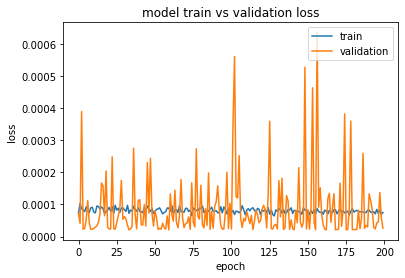

In [45]:
plt.plot(history.history['loss'][400:])
plt.plot(history.history['val_loss'][400:])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

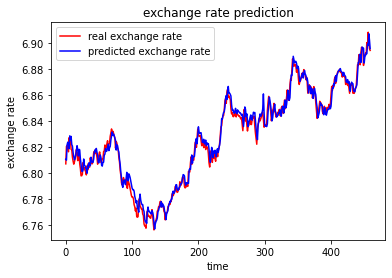

In [46]:
##### plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

[[6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Metal device set to: Apple M1


2022-05-21 22:07:18.443346: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-21 22:07:18.443584: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 5)              200       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-21 22:07:18.702116: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-21 22:07:19.362154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 22:07:19.549569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/373 [..............................] - ETA: 6:37 - loss: 46.6623

2022-05-21 22:07:19.594925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 22:07:19.655860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 22:07:19.739194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


373/373 [==============================] - ETA: 0s - loss: 26.0380

2022-05-21 22:07:22.924204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 22:07:22.991928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 22:07:23.013360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


373/373 [==============================] - 4s 9ms/step - loss: 26.0380 - val_loss: 7.9650
Epoch 2/600
373/373 [==============================] - 3s 8ms/step - loss: 3.5432 - val_loss: 1.1326
Epoch 3/600
373/373 [==============================] - 3s 8ms/step - loss: 0.5043 - val_loss: 0.0997
Epoch 4/600
373/373 [==============================] - 3s 8ms/step - loss: 0.0553 - val_loss: 0.0027
Epoch 5/600
373/373 [==============================] - 3s 8ms/step - loss: 0.0143 - val_loss: 0.0019
Epoch 6/600
373/373 [==============================] - 3s 9ms/step - loss: 0.0123 - val_loss: 0.0028
Epoch 7/600
373/373 [==============================] - 3s 8ms/step - loss: 0.0122 - val_loss: 0.0028
Epoch 8/600
373/373 [==============================] - 3s 9ms/step - loss: 0.0122 - val_loss: 0.0026
Epoch 9/600
373/373 [==============================] - 3s 9ms/step - loss: 0.0121 - val_loss: 0.0029
Epoch 10/600
373/373 [==============================] - 3s 8ms/step - loss: 0.0121 - val_loss: 0.0024


373/373 [==============================] - 3s 9ms/step - loss: 9.4448e-05 - val_loss: 6.4378e-05
Epoch 153/600
373/373 [==============================] - 3s 8ms/step - loss: 1.1390e-04 - val_loss: 1.2798e-04
Epoch 154/600
373/373 [==============================] - 3s 8ms/step - loss: 9.1140e-05 - val_loss: 2.8130e-05
Epoch 155/600
373/373 [==============================] - 3s 9ms/step - loss: 1.0897e-04 - val_loss: 3.7402e-05
Epoch 156/600
373/373 [==============================] - 3s 8ms/step - loss: 1.1623e-04 - val_loss: 2.5405e-05
Epoch 157/600
373/373 [==============================] - 3s 8ms/step - loss: 9.1073e-05 - val_loss: 4.9156e-05
Epoch 158/600
373/373 [==============================] - 3s 9ms/step - loss: 1.1008e-04 - val_loss: 7.3043e-05
Epoch 159/600
373/373 [==============================] - 3s 8ms/step - loss: 1.0935e-04 - val_loss: 4.1913e-05
Epoch 160/600
373/373 [==============================] - 3s 8ms/step - loss: 1.0342e-04 - val_loss: 3.0889e-05
Epoch 161/600
3

Epoch 226/600
373/373 [==============================] - 3s 8ms/step - loss: 9.1844e-05 - val_loss: 6.3651e-05
Epoch 227/600
373/373 [==============================] - 3s 9ms/step - loss: 8.2016e-05 - val_loss: 2.6547e-05
Epoch 228/600
373/373 [==============================] - 3s 8ms/step - loss: 1.3913e-04 - val_loss: 8.2112e-05
Epoch 229/600
373/373 [==============================] - 3s 8ms/step - loss: 1.1284e-04 - val_loss: 2.5634e-05
Epoch 230/600
373/373 [==============================] - 3s 9ms/step - loss: 9.9450e-05 - val_loss: 2.3449e-05
Epoch 231/600
373/373 [==============================] - 3s 8ms/step - loss: 1.0338e-04 - val_loss: 7.4676e-05
Epoch 232/600
373/373 [==============================] - 3s 8ms/step - loss: 8.8796e-05 - val_loss: 3.7526e-05
Epoch 233/600
373/373 [==============================] - 3s 9ms/step - loss: 7.7948e-05 - val_loss: 3.8859e-05
Epoch 234/600
373/373 [==============================] - 3s 9ms/step - loss: 9.4291e-05 - val_loss: 3.2843e-05
E

Epoch 300/600
373/373 [==============================] - 3s 9ms/step - loss: 8.9265e-05 - val_loss: 3.2606e-05
Epoch 301/600
373/373 [==============================] - 3s 9ms/step - loss: 8.9377e-05 - val_loss: 6.3170e-05
Epoch 302/600
373/373 [==============================] - 3s 9ms/step - loss: 9.5453e-05 - val_loss: 6.6778e-05
Epoch 303/600
373/373 [==============================] - 3s 8ms/step - loss: 9.0577e-05 - val_loss: 5.4218e-05
Epoch 304/600
373/373 [==============================] - 3s 8ms/step - loss: 8.3932e-05 - val_loss: 2.4111e-05
Epoch 305/600
373/373 [==============================] - 3s 9ms/step - loss: 8.0131e-05 - val_loss: 2.1789e-05
Epoch 306/600
373/373 [==============================] - 3s 8ms/step - loss: 9.3629e-05 - val_loss: 1.0826e-04
Epoch 307/600
373/373 [==============================] - 3s 9ms/step - loss: 9.3041e-05 - val_loss: 3.4408e-05
Epoch 308/600
373/373 [==============================] - 3s 8ms/step - loss: 8.2285e-05 - val_loss: 1.2422e-04
E

Epoch 374/600
373/373 [==============================] - 3s 9ms/step - loss: 8.5858e-05 - val_loss: 6.2300e-05
Epoch 375/600
373/373 [==============================] - 3s 9ms/step - loss: 9.1896e-05 - val_loss: 5.0175e-05
Epoch 376/600
373/373 [==============================] - 3s 9ms/step - loss: 8.0694e-05 - val_loss: 2.4267e-05
Epoch 377/600
373/373 [==============================] - 3s 9ms/step - loss: 9.1029e-05 - val_loss: 9.8016e-05
Epoch 378/600
373/373 [==============================] - 3s 9ms/step - loss: 8.6849e-05 - val_loss: 2.1610e-05
Epoch 379/600
373/373 [==============================] - 3s 9ms/step - loss: 8.9939e-05 - val_loss: 2.1716e-05
Epoch 380/600
373/373 [==============================] - 3s 9ms/step - loss: 9.1288e-05 - val_loss: 2.2109e-05
Epoch 381/600
373/373 [==============================] - 3s 9ms/step - loss: 9.8529e-05 - val_loss: 2.6971e-05
Epoch 382/600
373/373 [==============================] - 3s 9ms/step - loss: 7.3487e-05 - val_loss: 4.8160e-04
E

Epoch 448/600
373/373 [==============================] - 3s 9ms/step - loss: 9.5998e-05 - val_loss: 1.7455e-04
Epoch 449/600
373/373 [==============================] - 3s 9ms/step - loss: 7.9010e-05 - val_loss: 9.5164e-05
Epoch 450/600
373/373 [==============================] - 3s 9ms/step - loss: 7.2356e-05 - val_loss: 1.8602e-04
Epoch 451/600
373/373 [==============================] - 3s 9ms/step - loss: 9.4054e-05 - val_loss: 2.1368e-05
Epoch 452/600
373/373 [==============================] - 3s 9ms/step - loss: 9.8416e-05 - val_loss: 2.9908e-05
Epoch 453/600
373/373 [==============================] - 3s 9ms/step - loss: 8.0490e-05 - val_loss: 4.1921e-05
Epoch 454/600
373/373 [==============================] - 3s 9ms/step - loss: 9.5766e-05 - val_loss: 1.5536e-04
Epoch 455/600
373/373 [==============================] - 3s 9ms/step - loss: 8.7532e-05 - val_loss: 7.3118e-05
Epoch 456/600
373/373 [==============================] - 3s 9ms/step - loss: 1.0413e-04 - val_loss: 2.2885e-05
E

Epoch 522/600
373/373 [==============================] - 3s 8ms/step - loss: 1.0378e-04 - val_loss: 3.4701e-05
Epoch 523/600
373/373 [==============================] - 3s 9ms/step - loss: 8.4381e-05 - val_loss: 3.4091e-05
Epoch 524/600
373/373 [==============================] - 3s 8ms/step - loss: 9.0380e-05 - val_loss: 2.3644e-05
Epoch 525/600
373/373 [==============================] - 3s 9ms/step - loss: 7.9976e-05 - val_loss: 5.0605e-05
Epoch 526/600
373/373 [==============================] - 3s 8ms/step - loss: 9.3710e-05 - val_loss: 6.5255e-05
Epoch 527/600
373/373 [==============================] - 3s 9ms/step - loss: 8.3479e-05 - val_loss: 2.1507e-05
Epoch 528/600
373/373 [==============================] - 3s 9ms/step - loss: 8.7033e-05 - val_loss: 4.7106e-05
Epoch 529/600
373/373 [==============================] - 3s 8ms/step - loss: 8.0198e-05 - val_loss: 6.4158e-05
Epoch 530/600
373/373 [==============================] - 3s 9ms/step - loss: 9.1931e-05 - val_loss: 1.4287e-04
E

Epoch 596/600
373/373 [==============================] - 3s 9ms/step - loss: 9.6805e-05 - val_loss: 1.5287e-04
Epoch 597/600
373/373 [==============================] - 3s 9ms/step - loss: 8.9282e-05 - val_loss: 4.1820e-04
Epoch 598/600
373/373 [==============================] - 3s 8ms/step - loss: 9.7622e-05 - val_loss: 4.0905e-05
Epoch 599/600
373/373 [==============================] - 3s 8ms/step - loss: 8.1391e-05 - val_loss: 3.5082e-05
Epoch 600/600
373/373 [==============================] - 3s 9ms/step - loss: 8.9151e-05 - val_loss: 3.4353e-05


2022-05-21 22:39:19.136678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 22:39:19.223087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-21 22:39:19.274784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


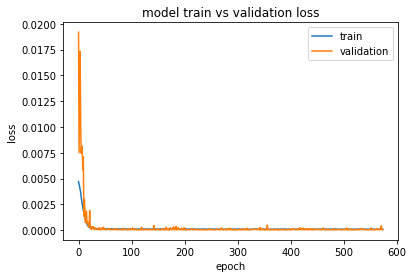

Tomorrow's exchange rate : [977.7914] CAD/KRW


In [27]:
## window_size = 1

dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 600
dfy = dfx[['ex']]

window_size = 1
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.9)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
history = model.fit(train_x, train_y, epochs=600, batch_size=10, validation_split=0.1)
pred_y = model.predict(test_x)

# Visualising the results
plt.plot(history.history['loss'][25:])
plt.plot(history.history['val_loss'][25:])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

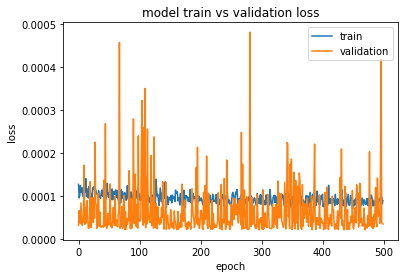

In [32]:
plt.plot(history.history['loss'][100:])
plt.plot(history.history['val_loss'][100:])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

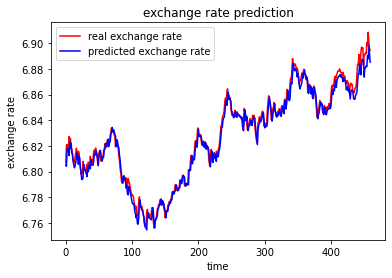

In [28]:
##### plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

In [ ]:
dfx = merge_df[['ex', 'int_spread', 'm1_spread', 'inf_spread']] # 반복횟수 100
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.9)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='relu'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
history = model.fit(train_x, train_y, epochs=100, batch_size=10, validation_split=0.1)
pred_y = model.predict(test_x)

# Visualising the results
plt.plot(history.history['loss'][25:])
plt.plot(history.history['val_loss'][25:])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

print("Tomorrow's exchange rate :", np.exp(merge_df['ex'][-1] * pred_y[-1] / dfy.ex[-1]), 'CAD/KRW')

[[6.900579595233041, -0.24499999999999988, 1.4712682817295981, -0.7087703227575981], [6.898078610679957, -0.266, 1.4712682817295981, -0.7087703227575981], [6.908584934722614, -0.19000000000000017, 1.4712682817295981, -0.7087703227575981], [6.9013347111792145, -0.20600000000000018, 1.4712682817295981, -0.7087703227575981], [6.895844627956302, -0.32800000000000007, 1.4712682817295981, -0.7087703227575981]] -> [6.894558584387745]
Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 5)              200       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                         

2022-05-22 09:46:12.765080: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-22 09:46:12.765208: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-22 09:46:12.903867: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-22 09:46:13.366297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is ena

373/373 [==============================] - ETA: 0s - loss: 27.2207

2022-05-22 09:46:39.069379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


373/373 [==============================] - 27s 69ms/step - loss: 27.2207 - val_loss: 0.9405
Epoch 2/100
373/373 [==============================] - 26s 69ms/step - loss: 0.0529 - val_loss: 0.0990
Epoch 3/100
373/373 [==============================] - 26s 70ms/step - loss: 0.0072 - val_loss: 0.0362
Epoch 4/100
373/373 [==============================] - 26s 70ms/step - loss: 0.0051 - val_loss: 0.0211
Epoch 5/100
373/373 [==============================] - 26s 69ms/step - loss: 0.0048 - val_loss: 0.0208
Epoch 6/100
373/373 [==============================] - 26s 70ms/step - loss: 0.0044 - val_loss: 0.0207
Epoch 7/100
373/373 [==============================] - 27s 71ms/step - loss: 0.0040 - val_loss: 0.0105
Epoch 8/100
373/373 [==============================] - 27s 72ms/step - loss: 0.0036 - val_loss: 0.0161
Epoch 9/100
373/373 [==============================] - 27s 73ms/step - loss: 0.0034 - val_loss: 0.0165
Epoch 10/100
373/373 [==============================] - 27s 73ms/step - loss: 0.0030

In [ ]:
##### plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()